#  Notes
* When scaling the whole painting, underlying tilts from the scanning will not go away. That means you can entire portions of the paiting with data in a certain range, like (1,2] and the other portion at [0,1].
* Due to the point above, I need to define a `shift_patches` function to subtract off the mean of each patch.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# for sampling and processing
from sklearn.feature_extraction.image import extract_patches
from sklearn.preprocessing import StandardScaler, RobustScaler

%matplotlib inline

# Importing and Adjusting

In [5]:
def data_to_array(data_address):
    """Imports x,y,z txt data, grabs and reshapes z values,
    returns ndarray with appropriate shape.
    data_address: str - file of xyz data
    returns: 2d ndarray with z values"""
    # import data
    data = pd.read_csv(data_address, header=None,
                  names = ['x','y','z'])
    # find out length and width
    width, length = data['y'].nunique(), data['x'].nunique()
    # get z-data as reshaped ndarray 
    z_arr = data['z'].values.reshape(width, length)
    # set negative values no NaNs
    z_arr[z_arr<0] = None
    return z_arr

In [6]:
def scale_data(data, scaler):
    """Takes data and sklearn scaler as input, returns scaled data.
    The function's purpose is to deal with reshaping."""
    # fit scaler to flattened data
    data_scaled = scaler.fit_transform(np.ravel(data).reshape(-1,1))
    # returns scaled data in original dimensions
    return data_scaled.reshape(data.shape)

# Testing Functions

In [18]:
d = data_to_array('./data/sample_data/Farah_Pot_5cm_sq_15um.txt')
ds = scale_data(d, RobustScaler())

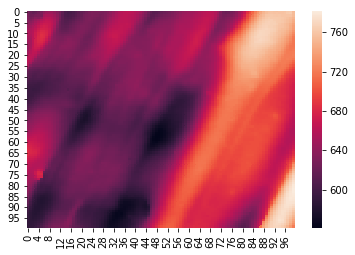

In [21]:
crop = 100
sns.heatmap(d[:crop,:crop]);

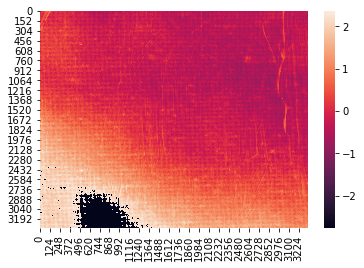

In [22]:
sns.heatmap(ds);